#15th March 2020

Error Percentages are printed below for both train and test errors.

The two kernels user are RBF vs POLY on a train size of 500 vs a test size of 5000


In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

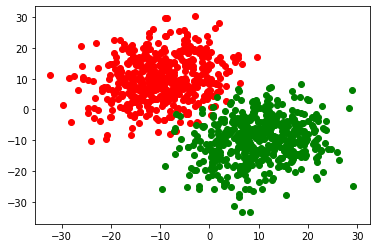

In [615]:
#Generate 2D Gaussian data withat least two component
trainNum = 500
testNum = 5000

mean1 = [-10,10]
mean2 = [10,-10]
cov = [[50, 10], [10, 50]]
cov2 = [[50, 10], [10, 50]]
x1,y1 = np.random.multivariate_normal(mean1, cov, trainNum).T
x2,y2 =  np.random.multivariate_normal(mean2, cov2, trainNum).T
plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='g')

#prepare training data
trainData1 = np.column_stack((x1,y1))
trainData2 = np.column_stack((x2,y2))
trainData = np.row_stack((trainData1, trainData2))
#prepare labels
labelData1 = np.zeros((trainNum,1))
labelData2 = np.ones((trainNum,1))
labelData = (np.row_stack((labelData1,labelData2))).ravel()

#print(trainData)

In [616]:

x3,y3 = np.random.multivariate_normal(mean1, cov, testNum).T
x4,y4 =  np.random.multivariate_normal(mean2, cov2, testNum).T

#prepare testData
xData1 = np.column_stack((x3,y3))
xData2 = np.column_stack((x4,y4))
xData = np.row_stack((xData1, xData2))


#prepare testlabels
yData1 = np.zeros((testNum,1))
yData2 = np.ones((testNum,1))
yData = (np.row_stack((yData1,yData2))).ravel()



THE ERROR PERCENTAGES FOR POLY KERNEL TRAIN AND TEST DATA ARE AS FOLLOWS:-
trainData error = 1.30%
testData error = 1.51%


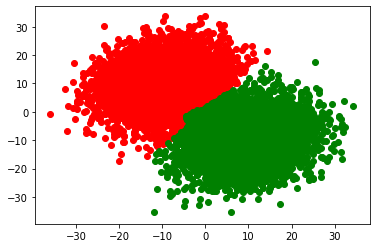

In [617]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#linear kernels 
clf = svm.SVC(kernel='poly')
clf.fit(trainData, labelData)

trainPredict = clf.predict(trainData)
testPredict = clf.predict(xData)
#print(yData.shape)
#print(testPredict.shape)
#print(trainPredict.shape)

print("THE ERROR PERCENTAGES FOR POLY KERNEL TRAIN AND TEST DATA ARE AS FOLLOWS:-")
trainError = 100*(1-accuracy_score(labelData, trainPredict))
testError = 100*(1-accuracy_score(yData, testPredict))
print("trainData error = " + str(trainError)[0:4] + '%')
print("testData error = " + str(testError)[0:4] + '%')


plt.figure()
plt.scatter(xData[np.where(testPredict==0)[0], 0], xData[np.where(testPredict==0)[0], 1], c='r')
plt.scatter(xData[np.where(testPredict==1)[0], 0], xData[np.where(testPredict==1)[0], 1], c='g')

THE ERROR PERCENTAGES FOR RBF KERNEL TRAIN AND TEST DATA ARE AS FOLLOWS:-
trainData error = 1.00%
testData error = 1.41%


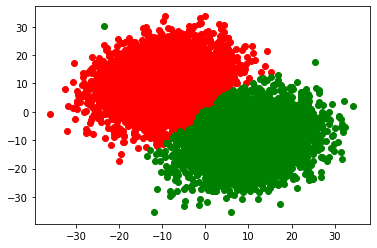

In [619]:
#rbf kernels 
clf2 = svm.SVC(kernel='rbf', gamma=0.1)
clf2.fit(trainData, labelData)
trainPredict2 = clf2.predict(trainData)
testPredict2 = clf2.predict(xData)
print("THE ERROR PERCENTAGES FOR RBF KERNEL TRAIN AND TEST DATA ARE AS FOLLOWS:-")
trainError = 100*(1-accuracy_score(labelData, trainPredict2))
testError = 100*(1-accuracy_score(yData, testPredict2))
print("trainData error = " + str(trainError)[0:4] + '%')
print("testData error = " + str(testError)[0:4] + '%')


plt.figure()
plt.scatter(xData[np.where(testPredict2==0)[0], 0], xData[np.where(testPredict2==0)[0], 1], c='r')
plt.scatter(xData[np.where(testPredict2==1)[0], 0], xData[np.where(testPredict2==1)[0], 1], c='g')
